In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# 한글 표시 설정
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


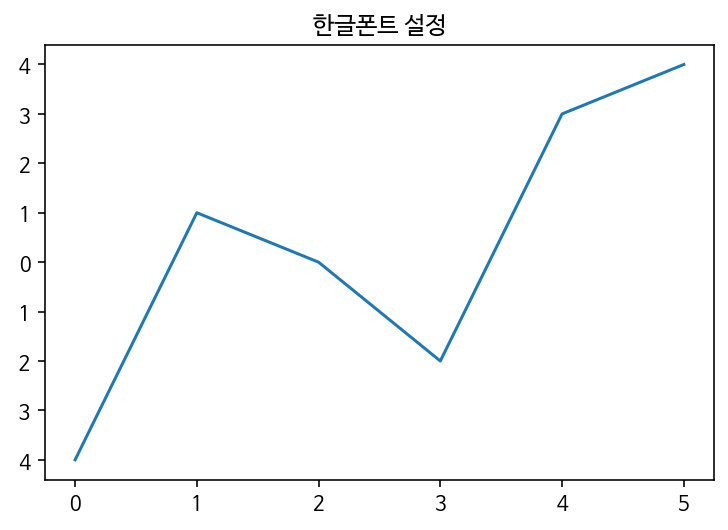

In [ ]:
pd.Series([-4,1,0,-2, 3,4]).plot(title='한글폰트 설정');

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/데이터/소상공인시장진흥공단_상권정보/소상공인시장진흥공단_상가(상권)정보_서울_202203.csv')

In [ ]:
data.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [ ]:
data.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
df = data[data['상호명'].str.contains('스타벅스')][['상호명', '지점명', '시군구명','법정동명','지번주소','도로명주소', '위도', '경도']].copy()
df.head()

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
1512,스타벅스,동숭로아트점,종로구,동숭동,서울특별시 종로구 동숭동 30,서울특별시 종로구 동숭길 110,37.582964,127.003887
2437,스타벅스남부터미널2점,남부터미널2점,서초구,서초동,서울특별시 서초구 서초동 1457-1,서울특별시 서초구 효령로 274,37.484386,127.014198
2533,스타벅스,현대목동점,양천구,목동,서울특별시 양천구 목동 916,서울특별시 양천구 목동동로 257,37.527147,126.874682
3534,스타벅스미아사거리역점,미아사거리역점,강북구,미아동,서울특별시 강북구 미아동 35-30,서울특별시 강북구 도봉로 32,37.611841,127.030685
3553,스타벅스,가로수길점,강남구,신사동,서울특별시 강남구 신사동 529-10,서울특별시 강남구 논현로175길 94,37.523184,127.021629


In [ ]:
df.shape

(461, 8)

In [ ]:
df['상호명'].unique()

array(['스타벅스', '스타벅스남부터미널2점', '스타벅스미아사거리역점', '스타벅스중랑구청점', '스타벅스구로디지털로점',
       '스타벅스구로에이스트윈타워1점', '스타벅스종로관수점', '스타벅스논현힐탑', '스타벅스을지로입구',
       '스타벅스교대역점', '스타벅스소공로북창점', '스타벅스고대프라자점', '스타벅스황학캐슬점', '스타벅스신세계본점',
       '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스여의도점', '스타벅스광화문점', '스타벅스구산역점',
       '스타벅스신촌점', '스타벅스숭실대점', '스타벅스상암DMC센트럴몰점', '스타벅스역삼역점', '스타벅스삼청동점',
       '스타벅스홍대삼거리점', '스타벅스광장점', '스타벅스신촌명물거리점', '스타벅스합정메세나몰점', '스타벅스대치점',
       '스타벅스광운대점', '스타벅스올림픽공원남문점', '스타벅스코엑스사거리점', '스타벅스신압구정점',
       '스타벅스명동중앙로', '스타벅스가락시장역점', '스타벅스외대점', '스타벅스광화문역점', '스타벅스명동역점',
       '스타벅스연세백양로점', '스타벅스W-MALL점', '스타벅스월드컵경기장점', '스타벅스서초파라곤점',
       '스타벅스가산디지털단지점', '스타벅스노원케이티점', '스타벅스강변역점', '스타벅스오목교역점',
       '스타벅스한성대입구역점', '스타벅스동묘앞역점동묘앞역점', '스타벅스포스코사거리점', '스타벅스종암점',
       '스타벅스신설동역점', '스타벅스문정역점', '스타벅스둔촌동점', '스타벅스경희대삼거리점', '스타벅스대치은마사거리점',
       '스타벅스송파방이DT점', '스타벅스서소문배재점', '스타벅스숙대점', '스타벅스강동역점', '스타벅스방화DT',
       '스타벅스종로3가점', '스타벅스강남오거리점', '스타벅스압구정점', '스타벅스가산디지털단지역점',
       '스타벅스마포이마트점', '스타벅스명동입구점', '스타벅스약수

In [ ]:
df.loc[df['상호명'] != '스타벅스', '상호명'] = '스타벅스'

In [ ]:
df.head()

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
1512,스타벅스,동숭로아트점,종로구,동숭동,서울특별시 종로구 동숭동 30,서울특별시 종로구 동숭길 110,37.582964,127.003887
2437,스타벅스,남부터미널2점,서초구,서초동,서울특별시 서초구 서초동 1457-1,서울특별시 서초구 효령로 274,37.484386,127.014198
2533,스타벅스,현대목동점,양천구,목동,서울특별시 양천구 목동 916,서울특별시 양천구 목동동로 257,37.527147,126.874682
3534,스타벅스,미아사거리역점,강북구,미아동,서울특별시 강북구 미아동 35-30,서울특별시 강북구 도봉로 32,37.611841,127.030685
3553,스타벅스,가로수길점,강남구,신사동,서울특별시 강남구 신사동 529-10,서울특별시 강남구 논현로175길 94,37.523184,127.021629


In [ ]:
df[df['지점명'].isnull()]

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
9187,스타벅스,NaN,강남구,논현동,서울특별시 강남구 논현동 216-5,서울특별시 강남구 논현로 648,37.511585,127.032255
10115,스타벅스,NaN,중구,삼각동,서울특별시 중구 삼각동 115,서울특별시 중구 남대문로10길 9,37.567200,126.983212
38845,스타벅스,NaN,중구,명동2가,서울특별시 중구 명동2가 2-16,서울특별시 중구 명동길 60,37.563762,126.985738
82658,스타벅스,NaN,강서구,방화동,서울특별시 강서구 방화동 293-4,서울특별시 강서구 방화대로 375,37.574439,126.816371
95947,스타벅스,NaN,영등포구,여의도동,서울특별시 영등포구 여의도동 23,서울특별시 영등포구 국제금융로 10,37.525172,126.924863
101267,스타벅스,NaN,송파구,문정동,서울특별시 송파구 문정동 628,서울특별시 송파구 충민로 10,37.478261,127.119371
102926,스타벅스,NaN,금천구,가산동,서울특별시 금천구 가산동 371-37,서울특별시 금천구 가산디지털1로 128,37.477224,126.883684
105765,스타벅스,NaN,강남구,청담동,서울특별시 강남구 청담동 84-3,서울특별시 강남구 선릉로 836,37.526538,127.040513
110303,스타벅스,NaN,성북구,동선동2가,서울특별시 성북구 동선동2가 134,서울특별시 성북구 보문로34길 62,37.590830,127.018842
112276,스타벅스,NaN,마포구,염리동,서울특별시 마포구 염리동 168-9,서울특별시 마포구 독막로 311,37.543991,126.947463


In [ ]:
df.loc[df['도로명주소'] == '서울특별시 강남구 논현로 648', '지점명'] = '논현힐탑점'
df.loc[df['도로명주소'] == '서울특별시 중구 남대문로10길 9', '지점명'] = '을지로경기빌딩점'

df.loc[df['도로명주소'] == '서울특별시 중구 명동길 60', '지점명'] = '명동중앙로점'
df.loc[df['도로명주소'] == '서울특별시 강서구 방화대로 375', '지점명'] = '방화DT점'

df.loc[df['도로명주소'] == '서울특별시 영등포구 국제금융로 10', '지점명'] = '여의도IFC(1F)점'
df.loc[df['도로명주소'] == '서울특별시 송파구 충민로 10', '지점명'] = '가든파이브점'

df.loc[df['도로명주소'] == '서울특별시 금천구 가산디지털1로 128', '지점명'] = '가산브이타워점'
df.loc[df['도로명주소'] == '서울특별시 강남구 선릉로 836', '지점명'] = '압구정로데오역점'

df.loc[df['도로명주소'] == '서울특별시 성북구 보문로34길 62', '지점명'] = '성신여대정문점'
df.loc[df['도로명주소'] == '서울특별시 마포구 독막로 311', '지점명'] = '마포염리점'

df.loc[df['도로명주소'] == '서울특별시 동작구 상도로 102', '지점명'] = '신대방삼거리역점'
df.loc[df['도로명주소'] == '서울특별시 서대문구 서소문로 21', '지점명'] = '충정타워점'

# df.loc[df['도로명주소'] == '서울특별시 서대문구 증가로29길 20-14', '지점명'] = '점포없음'
df.loc[df['도로명주소'] == '서울특별시 서초구 강남대로 595', '지점명'] = '강남대로신사점'

df.loc[df['도로명주소'] == '서울특별시 강남구 도곡로 183', '지점명'] = '역삼럭키점'
df.loc[df['도로명주소'] == '서울특별시 중구 퇴계로 100', '지점명'] = '별다방점'

# df.loc[df['도로명주소'] == '서울특별시 광진구 긴고랑로 45', '지점명'] = '점포없음'

In [ ]:
df[df['지점명'].isnull()]

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
184925,스타벅스,NaN,서대문구,북가좌동,서울특별시 서대문구 북가좌동 328-51,서울특별시 서대문구 증가로29길 20-14,37.582341,126.911859
261105,스타벅스,NaN,광진구,중곡동,서울특별시 광진구 중곡동 241-58,서울특별시 광진구 긴고랑로 45,37.562814,127.081329


In [ ]:
df.head()

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
1512,스타벅스,동숭로아트점,종로구,동숭동,서울특별시 종로구 동숭동 30,서울특별시 종로구 동숭길 110,37.582964,127.003887
2437,스타벅스,남부터미널2점,서초구,서초동,서울특별시 서초구 서초동 1457-1,서울특별시 서초구 효령로 274,37.484386,127.014198
2533,스타벅스,현대목동점,양천구,목동,서울특별시 양천구 목동 916,서울특별시 양천구 목동동로 257,37.527147,126.874682
3534,스타벅스,미아사거리역점,강북구,미아동,서울특별시 강북구 미아동 35-30,서울특별시 강북구 도봉로 32,37.611841,127.030685
3553,스타벅스,가로수길점,강남구,신사동,서울특별시 강남구 신사동 529-10,서울특별시 강남구 논현로175길 94,37.523184,127.021629


In [ ]:
df[df['지점명'].isnull()]

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
184925,스타벅스,NaN,서대문구,북가좌동,서울특별시 서대문구 북가좌동 328-51,서울특별시 서대문구 증가로29길 20-14,37.582341,126.911859
261105,스타벅스,NaN,광진구,중곡동,서울특별시 광진구 중곡동 241-58,서울특별시 광진구 긴고랑로 45,37.562814,127.081329


In [ ]:
# df = df.drop(df[<some boolean condition>].index)를 통한 인덱스 추출이 되지 않아서, 삭제할 행의 인덱스 값을 직접 입력
df = df.drop([184925, 261105])

In [ ]:
df['지점명'].isnull().sum()

0

In [ ]:
df.head()

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
1512,스타벅스,동숭로아트점,종로구,동숭동,서울특별시 종로구 동숭동 30,서울특별시 종로구 동숭길 110,37.582964,127.003887
2437,스타벅스,남부터미널2점,서초구,서초동,서울특별시 서초구 서초동 1457-1,서울특별시 서초구 효령로 274,37.484386,127.014198
2533,스타벅스,현대목동점,양천구,목동,서울특별시 양천구 목동 916,서울특별시 양천구 목동동로 257,37.527147,126.874682
3534,스타벅스,미아사거리역점,강북구,미아동,서울특별시 강북구 미아동 35-30,서울특별시 강북구 도봉로 32,37.611841,127.030685
3553,스타벅스,가로수길점,강남구,신사동,서울특별시 강남구 신사동 529-10,서울특별시 강남구 논현로175길 94,37.523184,127.021629


In [ ]:
# r'(ed$)': 'ed'로 끝나는 문자열 
df[~df['지점명'].str.contains(r'점$')]

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
82571,스타벅스,여의도화재보험,영등포구,여의도동,서울특별시 영등포구 여의도동 35-4,서울특별시 영등포구 국제금융로6길 38,37.521380,126.925981
95129,스타벅스,명동남산,중구,남산동3가,서울특별시 중구 남산동3가 13-31,서울특별시 중구 퇴계로 132,37.560740,126.986446
117958,스타벅스,마포경찰서후문,마포구,아현동,서울특별시 마포구 아현동 618-19,서울특별시 마포구 마포대로 173-14,37.550993,126.953589
118712,스타벅스,미스리,종로구,소격동,서울특별시 종로구 소격동 34-2,서울특별시 종로구 북촌로5가길 27,37.580648,126.981659
119347,스타벅스,착한빵,중구,신당동,서울특별시 중구 신당동 372-96,서울특별시 중구 동호로7길 31,37.552352,127.010881
119657,스타벅스,미스리,금천구,가산동,서울특별시 금천구 가산동 345-90,서울특별시 금천구 가산디지털2로 53,37.472947,126.881125
130025,스타벅스,구파발사거리,은평구,진관동,서울특별시 은평구 진관동 65,서울특별시 은평구 진관3로 21,37.639605,126.919103
138296,스타벅스,홍대입구역사거리,마포구,서교동,서울특별시 마포구 서교동 353-5,서울특별시 마포구 양화로 125,37.554739,126.920296
141876,스타벅스,을지로센터,중구,을지로2가,서울특별시 중구 을지로2가 204,서울특별시 중구 을지로5길 16,37.566944,126.984891
217525,스타벅스,석촌역,송파구,석촌동,서울특별시 송파구 석촌동 286-9,서울특별시 송파구 백제고분로 358,37.504246,127.106013


In [ ]:
df.loc[df['지점명'] == '여의도화재보험', '지점명'] = '여의도화재보험점'
df.loc[df['지점명'] == '명동남산', '지점명'] = '명동남산점'

df.loc[df['지점명'] == '마포경찰서후문', '지점명'] = '마포경찰서후문점'
# df.loc[df['지점명'] == '미스리', '지점명'] = '점포없음'

# df.loc[df['지점명'] == '착한빵', '지점명'] = '점포없음'
# df.loc[df['지점명'] == '미스리', '지점명'] = '점포없음'

df.loc[df['지점명'] == '구파발사거리', '지점명'] = '구파발사거리점'
df.loc[df['지점명'] == '홍대입구역사거리', '지점명'] = '홍대입구역사거리점'

df.loc[df['지점명'] == '을지로센터', '지점명'] = '을지로센터점'
df.loc[df['지점명'] == '석촌역', '지점명'] = '석촌역점'

In [ ]:
df = df.drop(df[~df['지점명'].str.contains(r'점$')].index)

In [ ]:
df[~df['지점명'].str.contains(r'점$')]

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도


In [ ]:
df.head()

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
1512,스타벅스,동숭로아트점,종로구,동숭동,서울특별시 종로구 동숭동 30,서울특별시 종로구 동숭길 110,37.582964,127.003887
2437,스타벅스,남부터미널2점,서초구,서초동,서울특별시 서초구 서초동 1457-1,서울특별시 서초구 효령로 274,37.484386,127.014198
2533,스타벅스,현대목동점,양천구,목동,서울특별시 양천구 목동 916,서울특별시 양천구 목동동로 257,37.527147,126.874682
3534,스타벅스,미아사거리역점,강북구,미아동,서울특별시 강북구 미아동 35-30,서울특별시 강북구 도봉로 32,37.611841,127.030685
3553,스타벅스,가로수길점,강남구,신사동,서울특별시 강남구 신사동 529-10,서울특별시 강남구 논현로175길 94,37.523184,127.021629


---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 1512 to 311438
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호명     456 non-null    object 
 1   지점명     456 non-null    object 
 2   시군구명    456 non-null    object 
 3   법정동명    456 non-null    object 
 4   지번주소    456 non-null    object 
 5   도로명주소   456 non-null    object 
 6   위도      456 non-null    float64
 7   경도      456 non-null    float64
dtypes: float64(2), object(6)
memory usage: 32.1+ KB


In [ ]:
df.isnull().sum()

상호명      0
지점명      0
시군구명     0
법정동명     0
지번주소     0
도로명주소    0
위도       0
경도       0
dtype: int64

In [ ]:
df['시군구명'].value_counts()

강남구     74
중구      40
서초구     38
송파구     33
마포구     27
종로구     26
영등포구    26
용산구     17
서대문구    16
강서구     16
광진구     15
성북구     15
강동구     13
양천구     13
관악구     11
동작구     11
노원구     11
구로구     10
금천구     10
동대문구     9
은평구      7
중랑구      6
성동구      5
강북구      5
도봉구      2
Name: 시군구명, dtype: int64

In [ ]:
df['법정동명'].value_counts()

역삼동      22
서초동      16
여의도동     15
대치동      13
방배동       9
         ..
태평로2가     1
노량진동      1
면목동       1
당주동       1
세곡동       1
Name: 법정동명, Length: 193, dtype: int64

In [ ]:
mean_lat = round(df['위도'].sum() / len(df['위도']), 5)
mean_lon = round(df['경도'].sum() / len(df['경도']), 5)

print(mean_lat)
print(mean_lon)

37.53664
126.99658


In [ ]:
import folium

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=12)

for i in df.index:
    latitude = df.loc[i, '위도']
    longitude = df.loc[i, '경도']
    branch = df.loc[i, '지점명']

    folium.Marker([latitude, longitude], tooltip=branch).add_to(m)

m

In [ ]:
from folium import Marker
from folium.plugins import MarkerCluster

# ▶ Base map 설정
m = folium.Map(location=[mean_lat, mean_lon], tiles='openstreetmap', zoom_start=12)

# ▶Marker cluster (위도, 경도, 제목)
mc = MarkerCluster()
for _, row in df.iterrows():
    mc.add_child(Marker(location = [row['위도'], row['경도']],popup=row['지점명']))
    
m.add_child(mc)

# ▶ Display the map
m

In [ ]:
# ▶ 총 점포수 대비 각 시군구에 있는 점포수의 밀집도 분석

df_density = pd.DataFrame(df.groupby('시군구명')['지점명'].count())
df_density['시군구별_합계'] = df_density['지점명'].sum()
df_density['밀집도'] = round((df_density['지점명'] / df_density['시군구별_합계']) * 100, 1)
df_density.head()

,지점명,시군구별_합계,밀집도
시군구명,,,
강남구,74,456,16.2
강동구,13,456,2.9
강북구,5,456,1.1
강서구,16,456,3.5
관악구,11,456,2.4


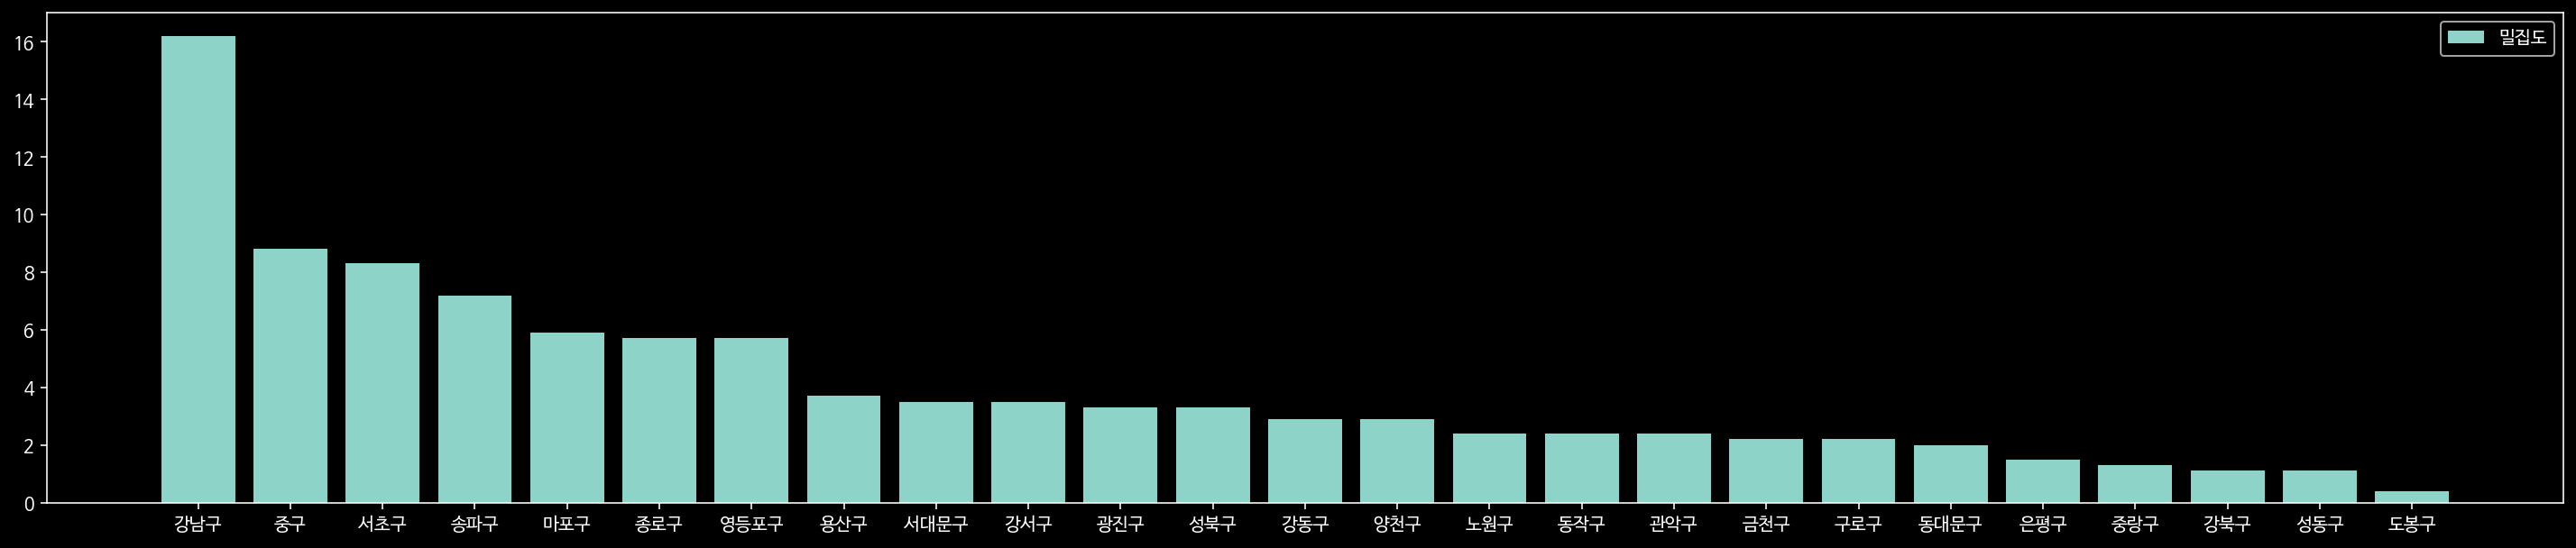

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df_density = df_density.sort_values(by=['밀집도'], ascending=False)

plt.style.use(['dark_background'])
plt.bar(df_density.index, df_density['밀집도'], label='밀집도');
plt.legend();
plt.gcf().set_size_inches(25, 5);

In [ ]:
# ▶ 밀집도가 가장 낮은 도봉구 mapping

df_dobong = df[df['시군구명']=='도봉구']
df_dobong

# ▶ Draw a basemap
m = folium.Map(location=[list(df_dobong['위도'])[0], list(df_dobong['경도'])[0]], tiles='openstreetmap', zoom_start=14)

# # ▶ Add points to the map
mc = MarkerCluster()
for _, row in df_dobong.iterrows():
    mc.add_child(    
        Marker(location = [row['위도'], row['경도']],
               popup=row['지점명']
              )
    )
    
m.add_child(mc)

# # ▶ Display the map
m

In [ ]:
df.head()

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
1512,스타벅스,동숭로아트점,종로구,동숭동,서울특별시 종로구 동숭동 30,서울특별시 종로구 동숭길 110,37.582964,127.003887
2437,스타벅스,남부터미널2점,서초구,서초동,서울특별시 서초구 서초동 1457-1,서울특별시 서초구 효령로 274,37.484386,127.014198
2533,스타벅스,현대목동점,양천구,목동,서울특별시 양천구 목동 916,서울특별시 양천구 목동동로 257,37.527147,126.874682
3534,스타벅스,미아사거리역점,강북구,미아동,서울특별시 강북구 미아동 35-30,서울특별시 강북구 도봉로 32,37.611841,127.030685
3553,스타벅스,가로수길점,강남구,신사동,서울특별시 강남구 신사동 529-10,서울특별시 강남구 논현로175길 94,37.523184,127.021629


In [ ]:
# ▶ 밀집도, 총 점포수 대비 각 시군구에 있는 점포수의 밀집도 분석

df_density_dong = pd.DataFrame(df.groupby(['시군구명', '법정동명'])['지점명'].count()).reset_index()
df_density_dong.columns = ['시군구명', '법정동명', '동별지점수']
df_density_dong.head()

,시군구명,법정동명,동별지점수
0,강남구,개포동,1
1,강남구,논현동,9
2,강남구,대치동,13
3,강남구,도곡동,3
4,강남구,삼성동,9


In [ ]:
# ▶ 전체 점포 수 대비 밀집도가 아닌, 각 시군구의 지점수 대비 밀집도를 계산

df_density_gu = pd.DataFrame(df.groupby(['시군구명'])['지점명'].count()).reset_index()
df_density_gu.columns = ['시군구명', '구별지점수']
df_density_gu.head()

,시군구명,구별지점수
0,강남구,74
1,강동구,13
2,강북구,5
3,강서구,16
4,관악구,11


In [ ]:
# ▶ 전체 점포 수 대비 밀집도가 아닌, 각 시군구의 지점수 대비 밀집도를 계산 (※ 상위에서 구한 시군구별 점포 수를 left join)

df_merge = pd.merge(df_density_gu, df_density_dong, how='left', on='시군구명')
df_merge['밀집도'] = (df_merge['동별지점수'] / df_merge['구별지점수']) * 100
df_merge = df_merge.sort_values(by=['밀집도'], ascending=False)
df_merge.head(10)

,시군구명,구별지점수,법정동명,동별지점수,밀집도
44,도봉구,2,창동,2,100.000000
34,구로구,10,구로동,7,70.000000
37,금천구,10,가산동,7,70.000000
111,양천구,13,목동,9,69.230769
26,관악구,11,봉천동,7,63.636364
16,강북구,5,미아동,3,60.000000
118,영등포구,26,여의도동,15,57.692308
41,노원구,11,상계동,5,45.454545
84,서초구,38,서초동,16,42.105263
90,성동구,5,성수동2가,2,40.000000


In [ ]:
df_merge.tail(10)

,시군구명,구별지점수,법정동명,동별지점수,밀집도
166,중구,40,삼각동,1,2.500000
165,중구,40,무교동,1,2.500000
163,중구,40,다동,1,2.500000
162,중구,40,남산동3가,1,2.500000
160,중구,40,남대문로4가,1,2.500000
159,중구,40,광희동1가,1,2.500000
5,강남구,74,세곡동,1,1.351351
9,강남구,74,일원동,1,1.351351
6,강남구,74,수서동,1,1.351351
0,강남구,74,개포동,1,1.351351


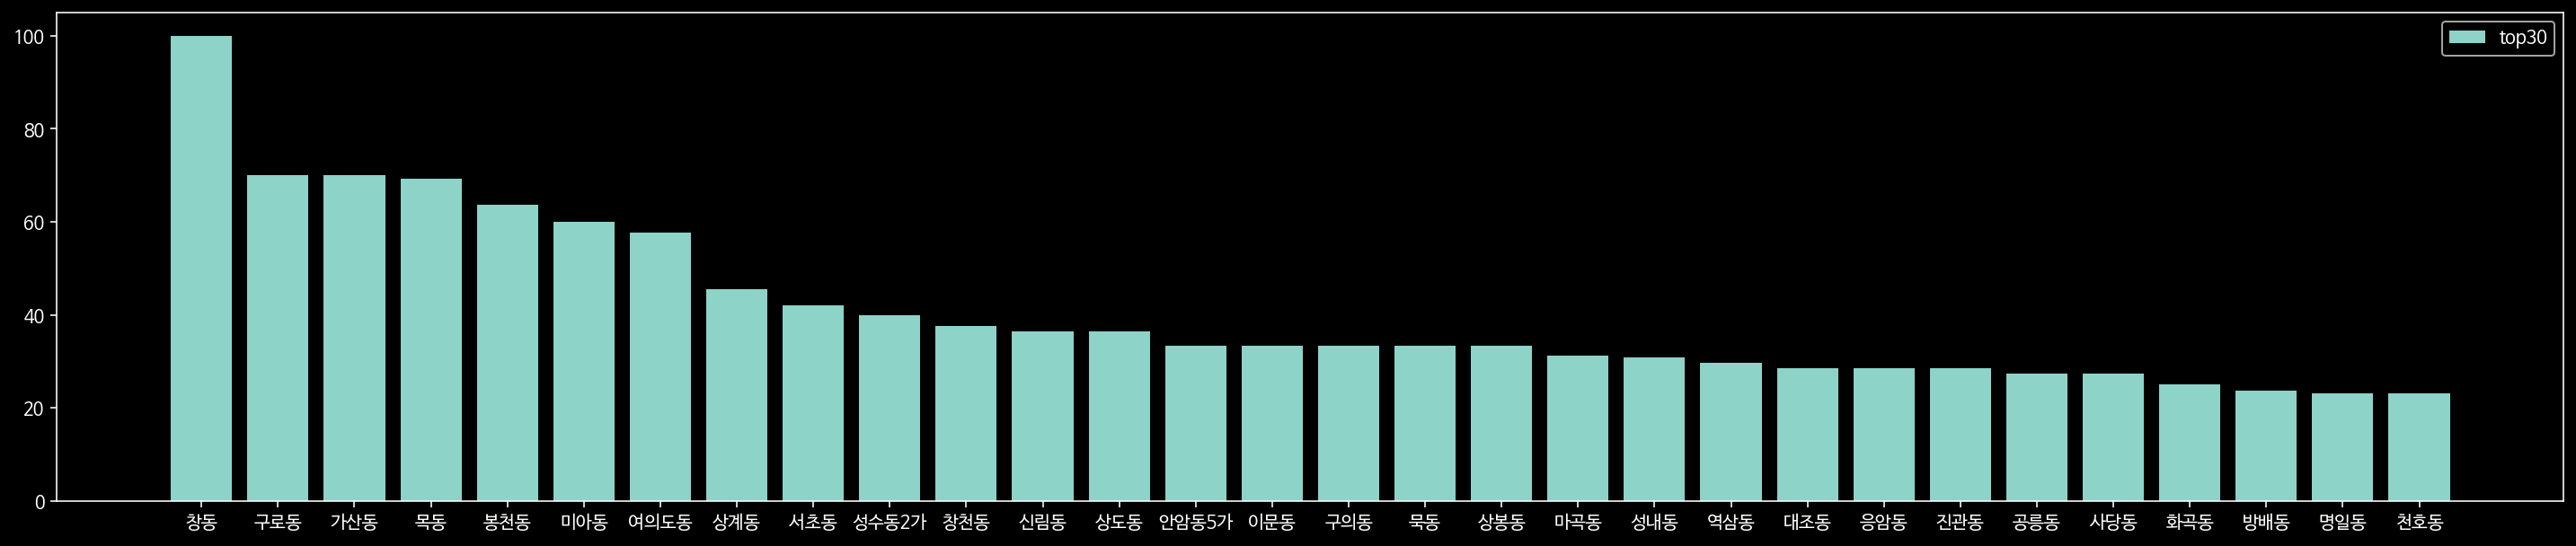

In [ ]:
# ▶ 법정동별 밀집도 기준, Top 30 

df_merge_30h = df_merge.head(30)
plt.bar(df_merge_30h['법정동명'], df_merge_30h['밀집도'], label='top30');
plt.legend()
plt.gcf().set_size_inches(25, 5);

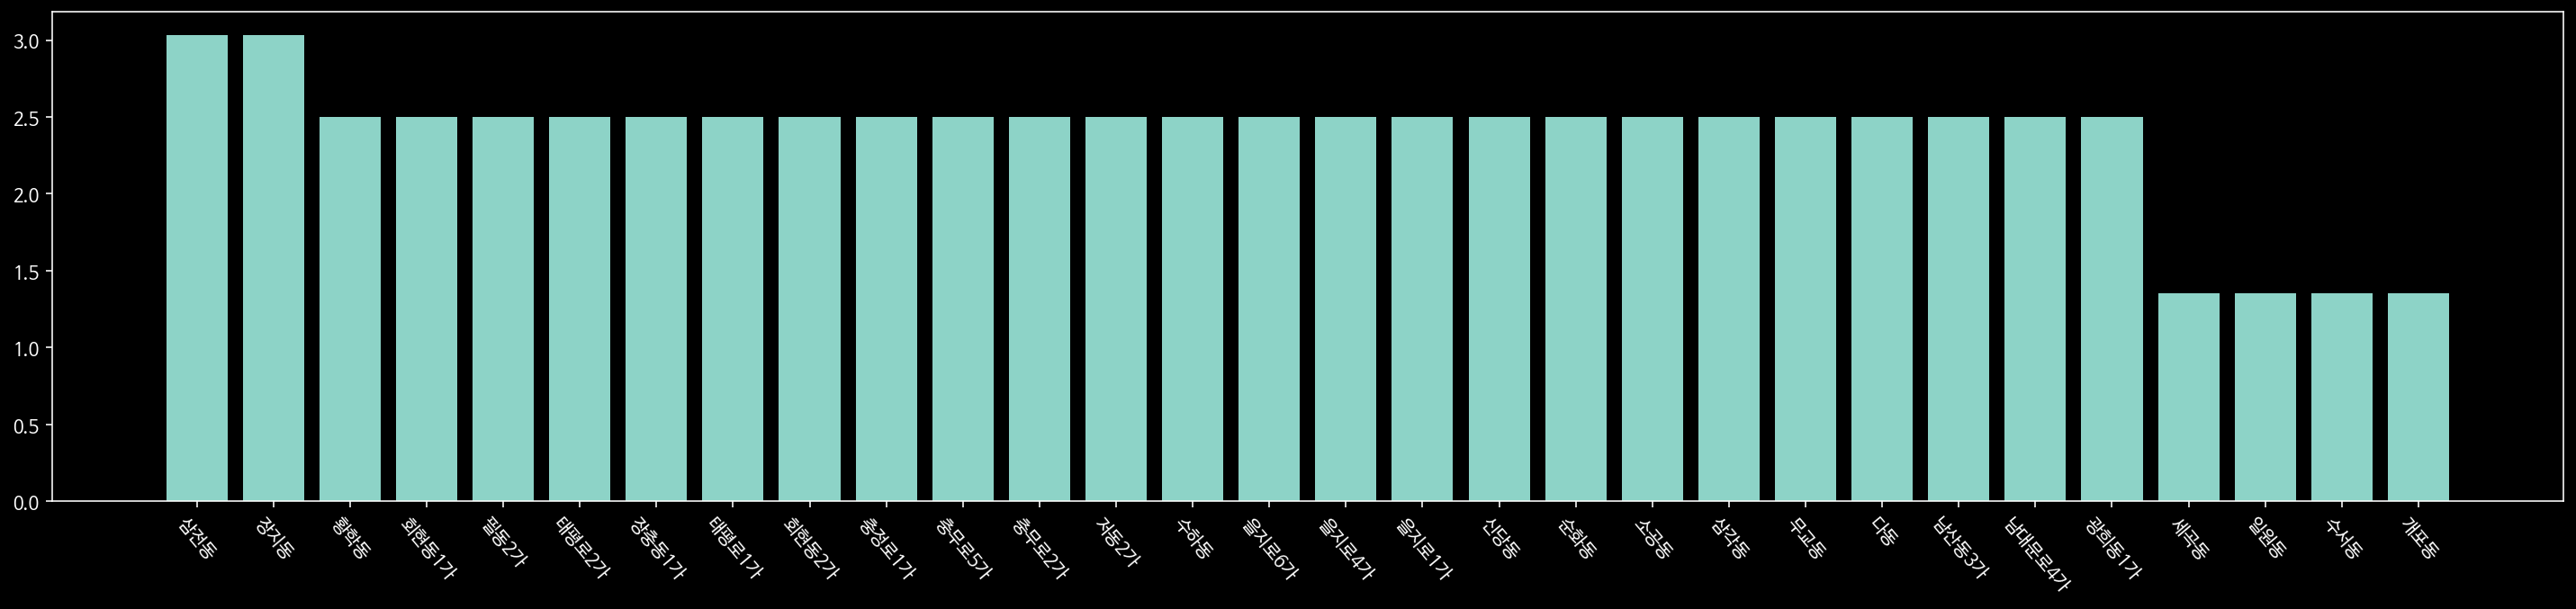

In [ ]:
# ▶ 법정동별 밀집도 기준, Tail 30 

df_merge_30t = df_merge.tail(30)
plt.xticks(rotation=-50)
plt.bar(df_merge_30t['법정동명'], df_merge_30t['밀집도'], label='tail30');
plt.gcf().set_size_inches(25, 5);

---

In [ ]:
df_density.head()

,지점명,시군구별_합계,밀집도
시군구명,,,
강남구,74,456,16.2
중구,40,456,8.8
서초구,38,456,8.3
송파구,33,456,7.2
마포구,27,456,5.9


In [ ]:
# ▶ 기존 산출했던 시군구별 밀집도

df_density.columns = ['지점수', '시군구별_지점수합계', '밀집도']
df_density = df_density.reset_index()
df_density.head(5)

,시군구명,지점수,시군구별_지점수합계,밀집도
0,강남구,74,456,16.2
1,중구,40,456,8.8
2,서초구,38,456,8.3
3,송파구,33,456,7.2
4,마포구,27,456,5.9


In [ ]:
# ▶ 시군구별 밀집도만 가져오기
df_density = df_density[['시군구명', '밀집도']]
df_density.head(5)

,시군구명,밀집도
0,강남구,16.2
1,중구,8.8
2,서초구,8.3
3,송파구,7.2
4,마포구,5.9


In [ ]:
# ▶ 법정동별 밀집도 데이터 재정비

df_merge.columns = ['시군구명', '동별지점수', '법정동명', '구별지점수', '동별밀집도']
df_merge = df_merge.reset_index(drop=True)
df_merge.head()

,시군구명,동별지점수,법정동명,구별지점수,동별밀집도
0,도봉구,2,창동,2,100.000000
1,구로구,10,구로동,7,70.000000
2,금천구,10,가산동,7,70.000000
3,양천구,13,목동,9,69.230769
4,관악구,11,봉천동,7,63.636364


In [ ]:
df_density.head()

,시군구명,밀집도
0,강남구,16.2
1,중구,8.8
2,서초구,8.3
3,송파구,7.2
4,마포구,5.9


In [ ]:
# ▶ 동별 밀집도 + 구별 밀집도 left join

df_merge = pd.merge(df_merge, df_density, how='left', on='시군구명')
df_merge.columns = ['시군구명', '구별지점수', '법정동명', '동별지점수', '구/동_밀집도', '시/구_밀집도']
df_merge.head()

,시군구명,구별지점수,법정동명,동별지점수,구/동_밀집도,시/구_밀집도
0,도봉구,2,창동,2,100.000000,0.4
1,구로구,10,구로동,7,70.000000,2.2
2,금천구,10,가산동,7,70.000000,2.2
3,양천구,13,목동,9,69.230769,2.9
4,관악구,11,봉천동,7,63.636364,2.4


In [ ]:
# ▶ 전략 기획에서 정의한, 구별 밀집도는 높으면서 동별 밀집도는 낮은 지역 탐색
df_merge.sort_values(by=['시/구_밀집도', '구/동_밀집도'], ascending = [False, True]).head(10)

,시군구명,구별지점수,법정동명,동별지점수,구/동_밀집도,시/구_밀집도
189,강남구,74,세곡동,1,1.351351,16.2
190,강남구,74,일원동,1,1.351351,16.2
191,강남구,74,수서동,1,1.351351,16.2
192,강남구,74,개포동,1,1.351351,16.2
132,강남구,74,도곡동,3,4.054054,16.2
84,강남구,74,청담동,6,8.108108,16.2
74,강남구,74,신사동,8,10.810811,16.2
61,강남구,74,삼성동,9,12.162162,16.2
62,강남구,74,논현동,9,12.162162,16.2
44,강남구,74,대치동,13,17.567568,16.2


In [ ]:
# ▶ 1순위 후보 지역
df[(df['시군구명']=='강남구') & (df['법정동명']=='세곡동')]

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
260487,스타벅스,강남세곡점,강남구,세곡동,서울특별시 강남구 세곡동 551,서울특별시 강남구 헌릉로569길 18,37.467265,127.099909


In [ ]:
df_dobong = df[df['시군구명']=='도봉구']

# ▶ Draw a basemap
m = folium.Map(location=[37.467265, 127.099909], tiles='openstreetmap', zoom_start=11)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_dobong.iterrows():
     mc.add_child(Marker(location = [row['위도'], row['경도']],popup=row['지점명']))
        
m.add_child(mc)

# ▶ 1순위 후보지역 Circle Marker 추가 
folium.CircleMarker(
  [37.467265, 127.099909],
  radius=100,
  color='#ffffgg',
  fill_color='#fffggg',
  popup='1순위 후보지역'
).add_to(m)

# ▶ Display the map
m

In [ ]:
df.head(10)

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
1512,스타벅스,동숭로아트점,종로구,동숭동,서울특별시 종로구 동숭동 30,서울특별시 종로구 동숭길 110,37.582964,127.003887
2437,스타벅스,남부터미널2점,서초구,서초동,서울특별시 서초구 서초동 1457-1,서울특별시 서초구 효령로 274,37.484386,127.014198
2533,스타벅스,현대목동점,양천구,목동,서울특별시 양천구 목동 916,서울특별시 양천구 목동동로 257,37.527147,126.874682
3534,스타벅스,미아사거리역점,강북구,미아동,서울특별시 강북구 미아동 35-30,서울특별시 강북구 도봉로 32,37.611841,127.030685
3553,스타벅스,가로수길점,강남구,신사동,서울특별시 강남구 신사동 529-10,서울특별시 강남구 논현로175길 94,37.523184,127.021629
3631,스타벅스,당산점,영등포구,당산동6가,서울특별시 영등포구 당산동6가 338-1,서울특별시 영등포구 양평로 64,37.535134,126.899952
4491,스타벅스,중랑구청점,중랑구,신내동,서울특별시 중랑구 신내동 563-3,서울특별시 중랑구 신내로 72,37.605400,127.095653
4617,스타벅스,문래역점,영등포구,문래동3가,서울특별시 영등포구 문래동3가 55-5,서울특별시 영등포구 당산로 34,37.517450,126.896479
4619,스타벅스,서강대점,마포구,신수동,서울특별시 마포구 신수동 63-14,서울특별시 마포구 백범로 23,37.552426,126.937543
5041,스타벅스,봉은사로선정릉점,강남구,삼성동,서울특별시 강남구 삼성동 114-9,서울특별시 강남구 봉은사로 446,37.511357,127.048501


In [ ]:
# ▶ 지점명 기준 '터미널'이 포함된 데이터만 Filter
df_station = df[df['지점명'].str.contains('역점')]
df_station

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
3534,스타벅스,미아사거리역점,강북구,미아동,서울특별시 강북구 미아동 35-30,서울특별시 강북구 도봉로 32,37.611841,127.030685
4617,스타벅스,문래역점,영등포구,문래동3가,서울특별시 영등포구 문래동3가 55-5,서울특별시 영등포구 당산로 34,37.517450,126.896479
9475,스타벅스,발산역점,강서구,등촌동,서울특별시 강서구 등촌동 678-14,서울특별시 강서구 강서로 388,37.560178,126.839290
10727,스타벅스,교대역점,서초구,서초동,서울특별시 서초구 서초동 1693-3,서울특별시 서초구 서초중앙로 138,37.494233,127.013955
12997,스타벅스,방배역점,서초구,방배동,서울특별시 서초구 방배동 908-10,서울특별시 서초구 방배로 84,37.481985,126.997631
...,...,...,...,...,...,...,...,...
234721,스타벅스,선릉역점,강남구,역삼동,서울특별시 강남구 역삼동 708-6,서울특별시 강남구 테헤란로 334,37.503941,127.048516
235249,스타벅스,신논현역점,서초구,반포동,서울특별시 서초구 반포동 748-1,서울특별시 서초구 강남대로 483,37.505315,127.023627
241137,스타벅스,논현역점,서초구,잠원동,서울특별시 서초구 잠원동 37-7,서울특별시 서초구 강남대로 557,37.511534,127.020628
242192,스타벅스,왕십리역점,성동구,도선동,서울특별시 성동구 도선동 58-1,서울특별시 성동구 왕십리로 326,37.562742,127.033880


In [ ]:
# ▶ 시군구명 기준으로 지하철역 근처에 가장 적은 매장을 가지고 있는 구 탐색
pd.DataFrame(df_station.groupby('시군구명')['지점명'].count()).reset_index().sort_values(by=['지점명'], ascending=True).head(10)

,시군구명,지점명
9,도봉구,1
7,금천구,1
6,구로구,1
24,중랑구,3
13,서대문구,3
21,은평구,3
10,동대문구,3
18,양천구,3
4,관악구,3
2,강북구,3


In [ ]:
df_station[df_station['시군구명'] == '도봉구']

,상호명,지점명,시군구명,법정동명,지번주소,도로명주소,위도,경도
53018,스타벅스,쌍문역점,도봉구,창동,서울특별시 도봉구 창동 659-5,서울특별시 도봉구 도봉로 480,37.648349,127.034869


In [ ]:
df_dobong = df[df['시군구명']=='도봉구']

# ▶ Draw a basemap
m = folium.Map(location=[list(df_dobong['위도'])[0], list(df_dobong['경도'])[0]], tiles='openstreetmap', zoom_start=14)

# ▶ Add  points to the map
mc = MarkerCluster()
for _, row in df_dobong.iterrows():
    mc.add_child(    
        Marker(location = [row['위도'], row['경도']],
               popup=row['지점명']
              )
    )
    
m.add_child(mc)

# ▶ 1순위 후보지 Circle Marker 추가
folium.CircleMarker(
  [37.648349, 127.034869],
  radius=100,
  color='#ffffgg',
  fill_color='#fffggg',
  popup='New_in'
).add_to(m)

# ▶ Display the map
m